In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd
df = pd.read_csv("baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
df.tail()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


In [4]:
df.shape

(1232, 15)

In [5]:
print(df.columns)

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')


* RA stands for runs allowed.
* RS stand for runs scored.
* OBP stands for On Base Percentage.
* SLG stand for Slugging Percentage.
* BA is Batting Average.
* OOBP is opponent’s OBP.
* OSLG is opponent’s SLG.
* W stands for number of wins in that season.

In [6]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [7]:
print (df["Playoffs"].value_counts())
print("*"*50)
print (df["Playoffs"].value_counts(normalize= True))

0    988
1    244
Name: Playoffs, dtype: int64
**************************************************
0    0.801948
1    0.198052
Name: Playoffs, dtype: float64


In [8]:
import matplotlib.pyplot as plt

In [9]:
moneyball = df[df["Year"] < 2002]

In [10]:
moneyball

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393
335,CHC,NL,2001,777,701,88,0.336,0.430,0.261,0,NaN,NaN,162,0.321,0.398
336,CHW,AL,2001,798,795,83,0.334,0.451,0.268,0,NaN,NaN,162,0.334,0.427
337,CIN,NL,2001,735,850,66,0.324,0.419,0.262,0,NaN,NaN,162,0.341,0.455
338,CLE,AL,2001,897,821,91,0.350,0.458,0.278,1,6.0,4.0,162,0.341,0.417
339,COL,NL,2001,923,906,73,0.354,0.483,0.292,0,NaN,NaN,162,0.350,0.480


In [11]:
import warnings
warnings.filterwarnings("ignore")
moneyball['RD']=moneyball['RS']-moneyball['RA']

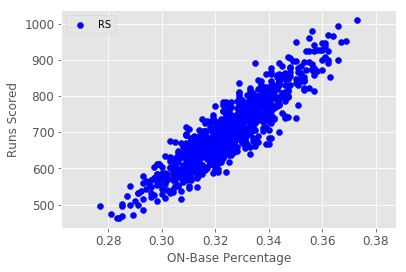

In [12]:
from matplotlib import style
style.use('ggplot')
plt.scatter(moneyball['OBP'],moneyball['RS'], c = 'b')
plt.ylabel('Runs Scored')
plt.xlabel('ON-Base Percentage')
plt.legend()
plt.show()

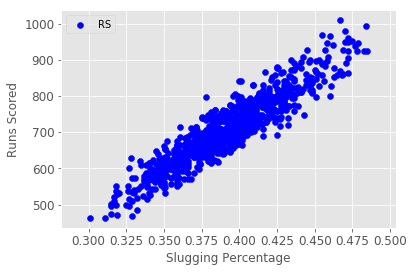

In [13]:
plt.scatter(moneyball['SLG'],moneyball['RS'], c = 'b')
plt.ylabel('Runs Scored')
plt.xlabel('Slugging Percentage')
plt.legend()
plt.show()

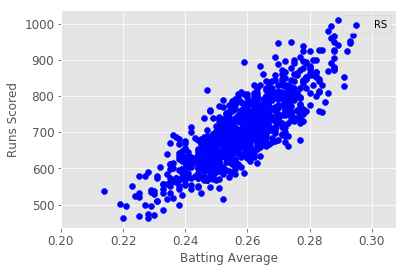

In [14]:
plt.scatter(moneyball['BA'],moneyball['RS'], c = 'b')
plt.ylabel('Runs Scored')
plt.xlabel('Batting Average')
plt.legend()
plt.show()

([], <a list of 0 Text yticklabel objects>)

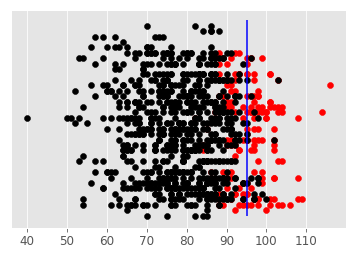

In [15]:
import warnings
warnings.filterwarnings("ignore")
team_idx = {v:k for (k, v) in enumerate(moneyball["Team"].unique())}
moneyball["_TeamID"] = [team_idx[x] for x in moneyball["Team"]]

moneyball_playoff = moneyball[moneyball["Playoffs"]==1]
plt.scatter(moneyball_playoff["W"], moneyball_playoff["_TeamID"], color="r")
moneyball_nonplayoff = moneyball[moneyball["Playoffs"]==0]
plt.scatter(moneyball_nonplayoff["W"], moneyball_nonplayoff["_TeamID"], color="k")
plt.vlines(95, 0, len(team_idx), colors="b", linestyles="solid")
plt.yticks([])

Run difference: 133.49


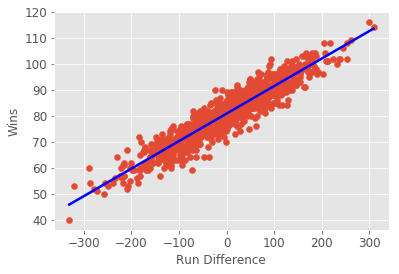

In [16]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
moneyball["_RDiff"] = moneyball["RS"] - moneyball["RA"]
plt.scatter(moneyball["_RDiff"], moneyball["W"])
plt.xlabel("Run Difference")
plt.ylabel("Wins")

win_model = LinearRegression()
win_model.fit(np.matrix(moneyball["_RDiff"]).T, moneyball["W"])
xs = [np.min(moneyball["_RDiff"]), np.max(moneyball["_RDiff"])]
ys = [win_model.predict(x) for x in xs]
plt.plot(xs, ys, 'b', linewidth=2.5)

run_diff_to_win = (95 - win_model.intercept_) / win_model.coef_[0]
print("Run difference: %.2f" % (run_diff_to_win))

In [17]:
moneyball0 = moneyball[moneyball["Playoffs"]==0]
moneyball1 = moneyball[moneyball["Playoffs"]==1]

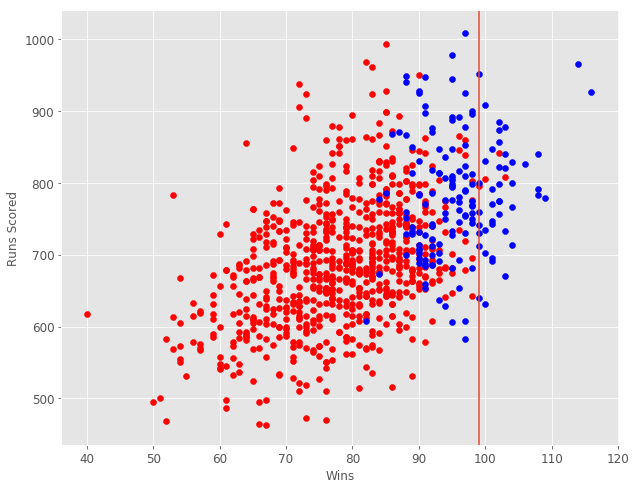

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(x=moneyball0.W,y = moneyball0.RS,c="red")
plt.scatter(x=moneyball1.W,y = moneyball1.RS,c="blue")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 99)

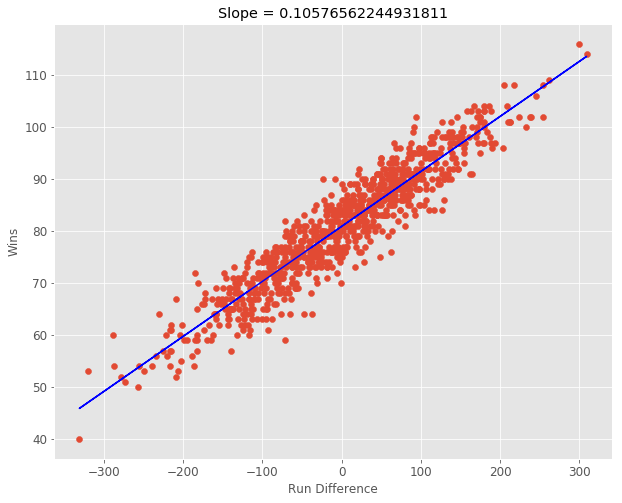

In [19]:
x = np.array(moneyball.RD)
y = np.array(moneyball.W)
# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.show()

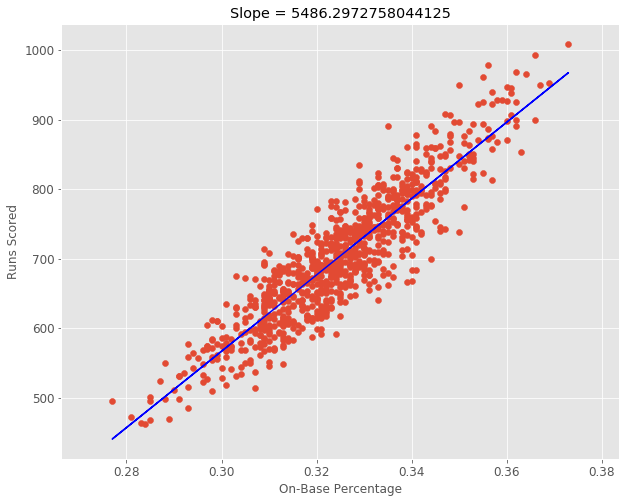

In [20]:
x = np.array(moneyball.OBP)
y = np.array(moneyball.RS)
# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("On-Base Percentage")
plt.ylabel("Runs Scored")
plt.show()

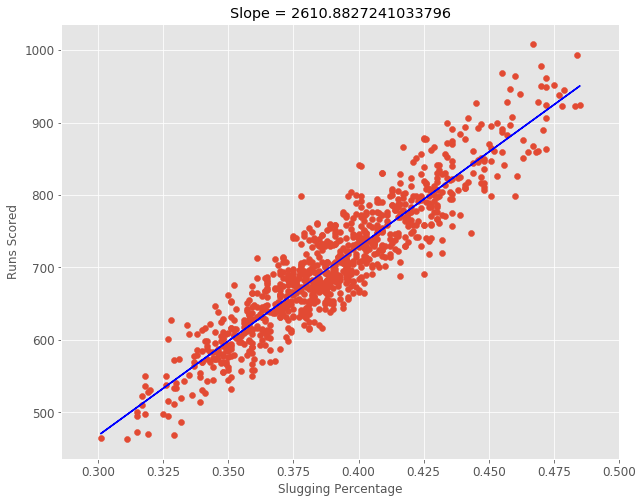

In [21]:
x = np.array(moneyball.SLG)
y = np.array(moneyball.RS)
# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Slugging Percentage")
plt.ylabel("Runs Scored")
plt.show()

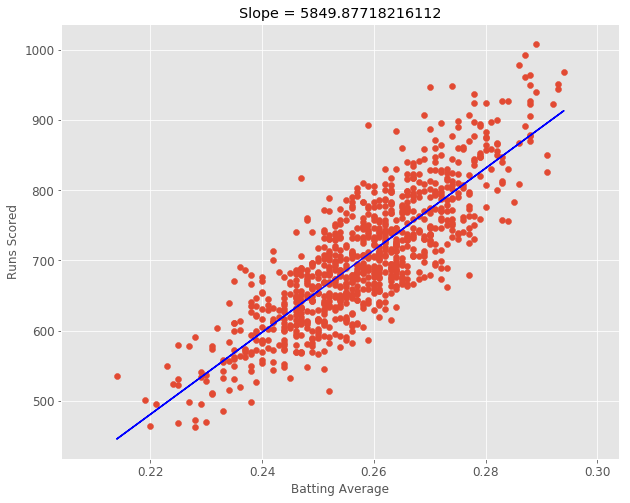

In [22]:
x = np.array(moneyball.BA)
y = np.array(moneyball.RS)
# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Batting Average")
plt.ylabel("Runs Scored")
plt.show()

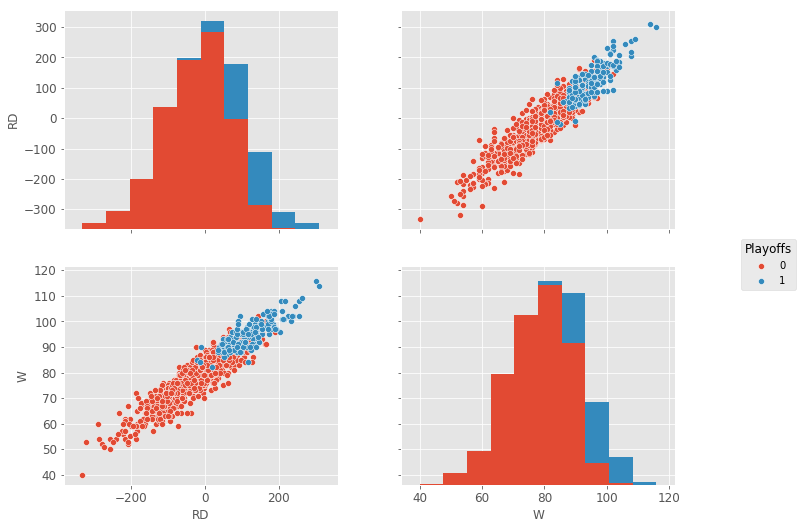

In [23]:
import seaborn as sns
corrcheck=moneyball[['RD', 'W', 'Playoffs']].copy()
g=sns.pairplot(corrcheck, hue='Playoffs',vars=["RD", "W"])
g.fig.set_size_inches(12,8)

In [24]:
y = np.array(moneyball["RS"])
X = np.vstack((np.array(moneyball["OBP"]), 
               np.array(moneyball["SLG"]),
               np.array(moneyball["BA"]))).T
rs_model = LinearRegression()
rs_model.fit(X, y)
print("R-squared[RS_1]: %.4f" % (rs_model.score(X, y)))
print(rs_model.intercept_, rs_model.coef_)


R-squared[RS_1]: 0.9302
-788.4570470807923 [2917.42140821 1637.92766577 -368.96606009]


In [25]:
X = np.vstack((np.array(moneyball["OBP"]), 
               np.array(moneyball["SLG"]))).T
rs_model = LinearRegression()
rs_model.fit(X, y)
print("R-squared[RS_2]: %.4f" % (rs_model.score(X, y)))
print(rs_model.intercept_, rs_model.coef_)

R-squared[RS_2]: 0.9296
-804.6270610622398 [2737.76802227 1584.90860546]


In [26]:
moneyball_ra = pd.DataFrame({"OOBP": moneyball["OOBP"],
                             "OSLG": moneyball["OSLG"],
                             "RA": moneyball["RA"]})
moneyball_ra = moneyball_ra.dropna(axis=0)
y = np.array(moneyball_ra["RA"])
X = np.vstack((np.array(moneyball_ra["OOBP"]), 
               np.array(moneyball_ra["OSLG"]))).T
ra_model = LinearRegression()
ra_model.fit(X, y)
print("R-squared[RA]: %.4f" % (ra_model.score(X, y)))
print(rs_model.intercept_, ra_model.coef_)

R-squared[RA]: 0.9073
-804.6270610622398 [2913.59948582 1514.28595842]


In [27]:
pred_rs = rs_model.predict(np.matrix([0.339, 0.430]))
pred_ra = ra_model.predict(np.matrix([0.307, 0.373]))
pred_rd = pred_rs - pred_ra
pred_wins = win_model.predict(np.matrix([pred_rd]))
print("Predicted Runs Scored in 2002: %.2f" % (pred_rs))
print("Predicted Runs Allowed in 2002: %.2f" % (pred_ra))
print("Predicted Wins in 2002: %.2f" % (pred_wins))

Predicted Runs Scored in 2002: 804.99
Predicted Runs Allowed in 2002: 621.93
Predicted Wins in 2002: 100.24


In [28]:
print(np.corrcoef(moneyball.OBP,moneyball.RS))

[[1.         0.90490915]
 [0.90490915 1.        ]]


In [29]:
print(np.corrcoef(moneyball.SLG,moneyball.RS))

[[1.         0.92638433]
 [0.92638433 1.        ]]


In [30]:
print(np.corrcoef(moneyball.BA,moneyball.RS))

[[1.         0.83162475]
 [0.83162475 1.        ]]


In [31]:
moneyballnew = moneyball.dropna()

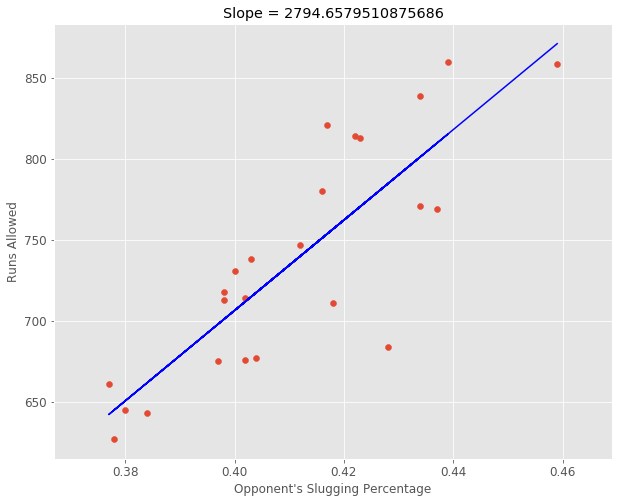

In [32]:
x = np.array(moneyballnew.OSLG)
y = np.array(moneyballnew.RA)
# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Opponent's Slugging Percentage")
plt.ylabel("Runs Allowed")
plt.show()

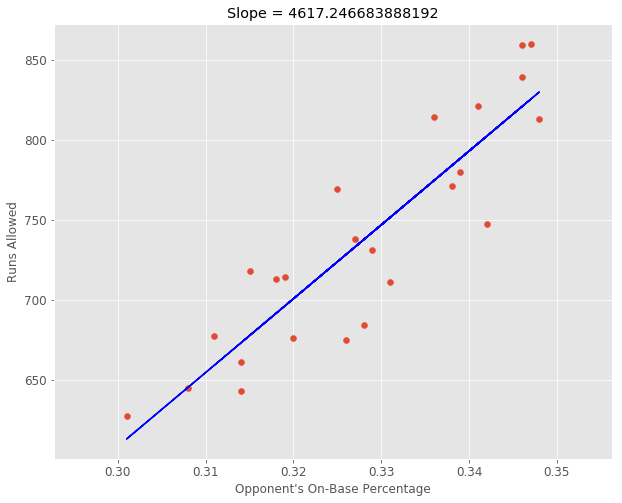

In [33]:
x = np.array(moneyballnew.OOBP)
y = np.array(moneyballnew.RA)
# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Opponent's On-Base Percentage")
plt.ylabel("Runs Allowed")
plt.show()

In [34]:
x = moneyball[['OBP','SLG','BA']].values
y = moneyball[['RS']].values
RS_model = LinearRegression()
RS_model.fit(x,y)
print(RS_model.intercept_)
print(RS_model.coef_)

[-788.45704708]
[[2917.42140821 1637.92766577 -368.96606009]]


In [35]:
x = moneyball[['OBP','SLG']].values
y = moneyball[['RS']].values
RS_model = LinearRegression()
RS_model.fit(x,y)
print(RS_model.intercept_)
print(RS_model.coef_)

[-804.62706106]
[[2737.76802227 1584.90860546]]


In [36]:
x = moneyballnew[['OOBP','OSLG']].values
y = moneyballnew[['RA']].values
RA_model = LinearRegression()
RA_model.fit(x,y)
print(RA_model.intercept_)
print(RA_model.coef_)

[-775.16234861]
[[3225.00378812 1106.50390975]]


Here are the Oakland Athletics statistics in 2001 before the playoffs.

OBP: 0.339

SLG: 0.430

OOBP: 0.307

OSLG: 0.373

In [37]:
x = moneyball[['RD']].values
y = moneyball[['W']].values
W_model = LinearRegression()
W_model.fit(x,y)
print(W_model.intercept_)
print(W_model.coef_)

[80.88137472]
[[0.10576562]]


In [38]:
# Prediction for runs scored.
RS_model.predict([[0.339,0.430]])

array([[804.98699884]])

In [39]:
# Predictions for runs allowed.
RA_model.predict([[0.307,0.373]])

array([[627.63977268]])

In [43]:
W_model.predict([[177]])

array([[99.6018899]])

Comparing our model results with the actual outcome and De Podesta’s estimates we get:

Variable,De Podesta's estimates,Our Model,Actual

RS,814,805,800

RA,645,622,654

W,99,100,103